# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [23]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [24]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [26]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

1.1. Посмотрим сколько мужчин и сколько женщин:

In [27]:
data_Sex = data['Sex'].value_counts()
count_male = data_Sex['male']
count_female = data_Sex['female']
print(f'Количество мужчик = {count_male}, количество женщин = {count_female}')

Количество мужчик = 577, количество женщин = 314


т.е. мужчин почти в 2 раза больше чем женщин

1.2. Аналогично посмотрим статистику по классам, нарисуем распределение по классам:

In [28]:
data_Pclass = data['Pclass'].value_counts()
for i in data_Pclass.keys():
  count_class_i = data_Pclass[i]
  print(f'Количство людей из класса {i} равно {count_class_i}')

Количство людей из класса 3 равно 491
Количство людей из класса 1 равно 216
Количство людей из класса 2 равно 184


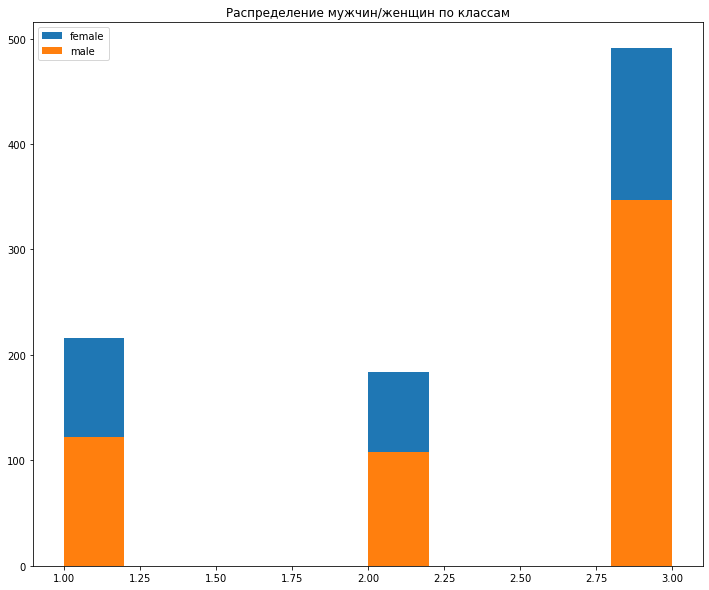

In [29]:
plt.figure(figsize=(12, 10))
plt.title('Распределение мужчин/женщин по классам')
plt.hist(data['Pclass'], label='female')
plt.hist(data[data['Sex']=='male']['Pclass'], label='male')
plt.legend()
plt.show()

Посчитайте долю выживших мужчин к общему количеству мужчин:

In [30]:
data_male_01 = data[data['Sex']=='male']['Survived'].value_counts()
data_male_01

0    468
1    109
Name: Survived, dtype: int64

In [31]:
nu_male_1 = data_male_01[1] / count_male
print(f'Доля выживших мужчин равна {nu_male_1}')

Доля выживших мужчин равна 0.18890814558058924


Посчитайте долю выживших женщин к общему количеству женщин:

In [32]:
data_female_01 = data[data['Sex']=='female']['Survived'].value_counts()
data_female_01

1    233
0     81
Name: Survived, dtype: int64

In [33]:
nu_female_1 = data_female_01[1] / count_female
print(f'Доля выживших женщин равна {nu_female_1}')

Доля выживших женщин равна 0.7420382165605095


Видим что доля выживших женщин гораздо выше, скорее всего их в первую очередь с детьми садили в шлюпки

Построим гистограмму для анализа по возрасту выживших мужчин / женщин:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


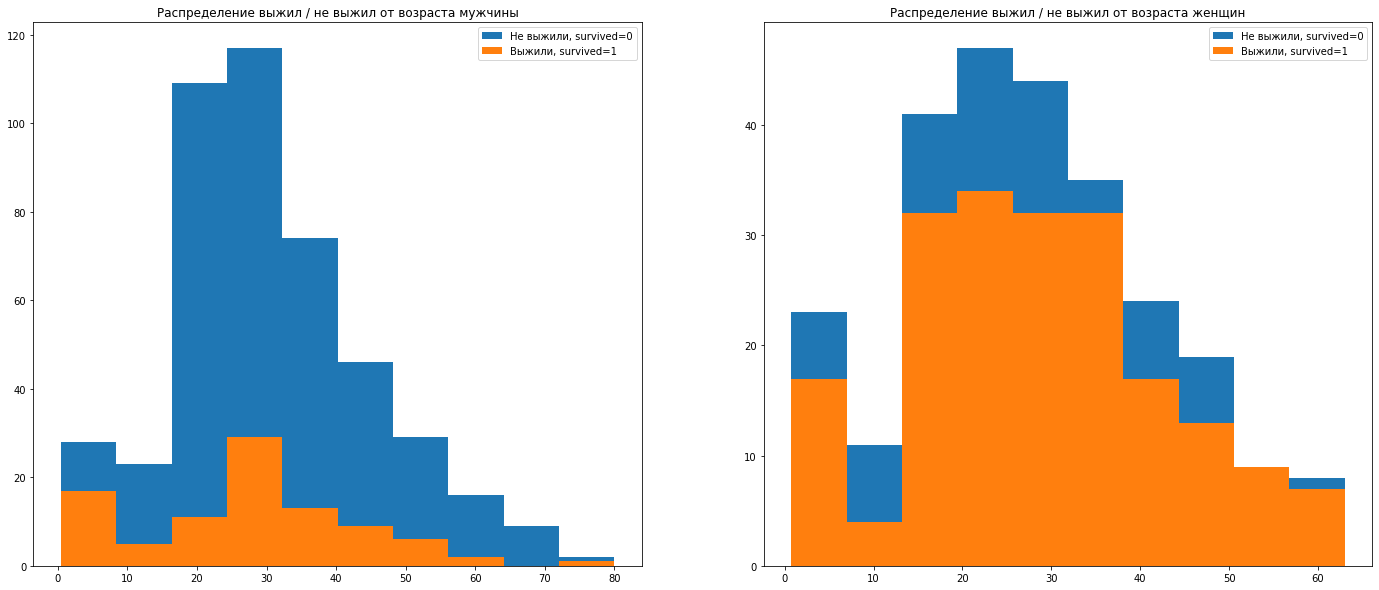

In [34]:
fig, axes = plt.subplots(1,2, figsize=(24,10))
axes[0].set_title('Распределение выжил / не выжил от возраста мужчины')
axes[0].hist(data[data['Sex']=='male']['Age'], label='Не выжили, survived=0')
axes[0].hist(data[data['Sex']=='male'][data['Survived']==1]['Age'], label='Выжили, survived=1')
axes[0].legend()

axes[1].set_title('Распределение выжил / не выжил от возраста женщин')
axes[1].hist(data[data['Sex']=='female']['Age'], label='Не выжили, survived=0')
axes[1].hist(data[data['Sex']=='female'][data['Survived']==1]['Age'], label='Выжили, survived=1')
axes[1].legend()

Построим гистограмму для анализа по классам выживших мужчин / женщин:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


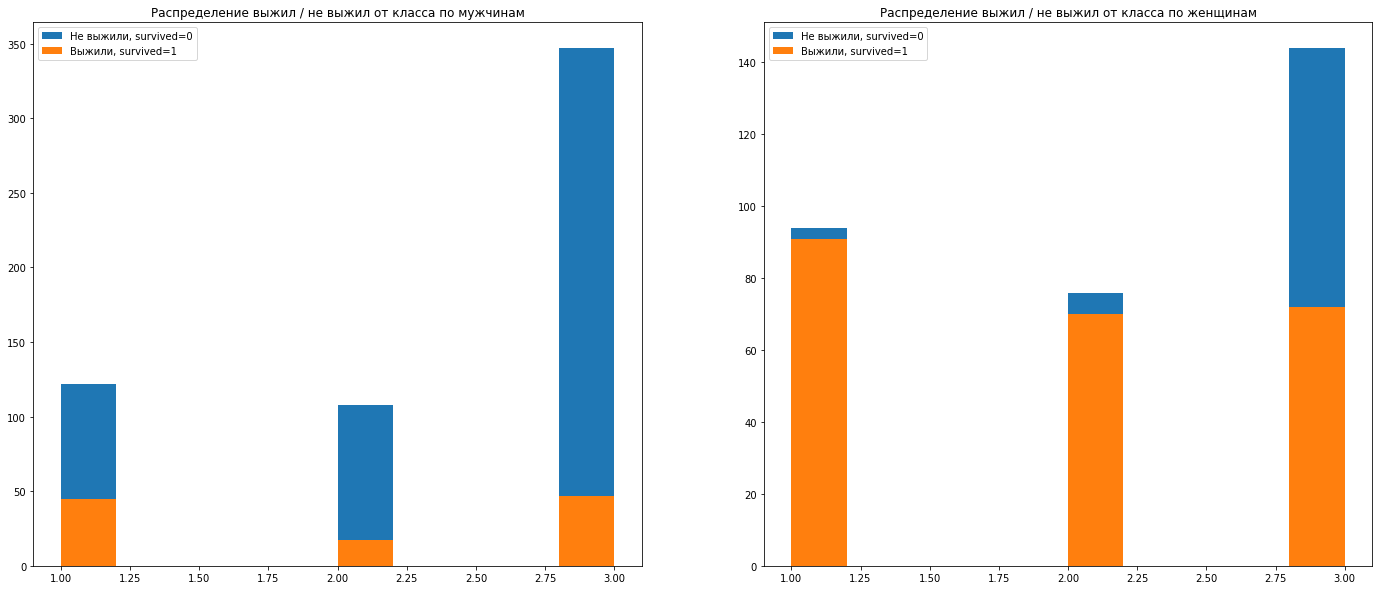

In [35]:
fig, axes = plt.subplots(1,2, figsize=(24,10))
axes[0].set_title('Распределение выжил / не выжил от класса по мужчинам')
axes[0].hist(data[data['Sex']=='male']['Pclass'], label='Не выжили, survived=0')
axes[0].hist(data[data['Sex']=='male'][data['Survived']==1]['Pclass'], label='Выжили, survived=1')
axes[0].legend()

axes[1].set_title('Распределение выжил / не выжил от класса по женщинам')
axes[1].hist(data[data['Sex']=='female']['Pclass'], label='Не выжили, survived=0')
axes[1].hist(data[data['Sex']=='female'][data['Survived']==1]['Pclass'], label='Выжили, survived=1')
axes[1].legend()

Доля выживших из класса 1 очень большая у женщин, и максимальная среди мужчин. Очень большой скачок для женщин в классе 3 по сравнению с классами 1 и 2(

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [36]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [37]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [38]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size=0.7)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [39]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [40]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [41]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data['cabin_type'] = data.apply(get_cabin_letter, axis=1)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0


Сюда добавьте описание вашего нового признака

Отделим мальчиков от мужчин. Отделять девочек от женщин не будем

In [42]:
def compute_my_feature(row): #rename this function appropriately
    if row['Sex'] == 'female':
      return 0
    elif row['Age'] < 19:
      return 1
    else:
      return 2

data['Sex_type'] = data.apply(compute_my_feature, axis=1)

data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,Sex_type
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,2


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [43]:
data_categorical = pd.concat([pd.get_dummies(data.Pclass, prefix="Pclass"), pd.get_dummies(data.Sex_type, prefix="Sex_type"), 
                              pd.get_dummies(data.Embarked, prefix="Emb"), pd.get_dummies(data.Embarked, prefix="cabin_type")], 
                             axis='columns')
data_categorical.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_type_0,Sex_type_1,Sex_type_2,Emb_0,Emb_C,Emb_Q,Emb_S,cabin_type_0,cabin_type_C,cabin_type_Q,cabin_type_S
PassengerId,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [44]:
data_numeric = pd.concat([data['Age'], data['SibSp'], data['Parch'], data['Fare']], axis='columns')
data_numeric.head()

,Age,SibSp,Parch,Fare
PassengerId,,,,
1,22.0,1,0,7.2500
2,38.0,1,0,71.2833
3,26.0,0,0,7.9250
4,35.0,1,0,53.1000
5,35.0,0,0,8.0500


In [45]:
X = pd.concat([data_categorical, data_numeric], axis='columns')

In [46]:
y = data['Survived']

In [47]:
X.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_type_0,Sex_type_1,Sex_type_2,Emb_0,Emb_C,Emb_Q,Emb_S,cabin_type_0,cabin_type_C,cabin_type_Q,cabin_type_S,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,22.0,1,0,7.2500
2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,38.0,1,0,71.2833
3,0,0,1,1,0,0,0,0,0,1,0,0,0,1,26.0,0,0,7.9250
4,1,0,0,1,0,0,0,0,0,1,0,0,0,1,35.0,1,0,53.1000
5,0,0,1,0,0,1,0,0,0,1,0,0,0,1,35.0,0,0,8.0500


## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
def plot_roc_curve(model, X_train, X_test, y_train, y_test):
  y_train_proba = model.predict_proba(X_train)[:, 1]
  y_test_proba = model.predict_proba(X_test)[:, 1]

  plt.figure(figsize=(12, 10))

  print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
  print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')

  plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
  plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

  plt.plot([0,1], [0,1], linestyle='--', color='black')
  plt.grid(True)
  plt.legend()
  plt.show()

Возьмем Логистическую регрессию:

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [51]:
data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
772,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,0,S,0
699,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,0
530,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,0,S,0
577,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,0,S,1
662,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,0,C,0


In [57]:
X_data_train = data_train.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
y_data_train = data_train['Survived']

In [58]:
X_data_test = data_test.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
y_data_test = data_test['Survived']

In [59]:
scaler = StandardScaler()

X_data_train = scaler.fit_transform(X_data_train)
X_data_test = scaler.transform(X_data_test)

In [60]:
result = cross_val_score(estimator=LogisticRegression(), X=X_data_train, y=y_data_train, scoring='accuracy', cv=5)
result

array([0.656     , 0.704     , 0.664     , 0.65322581, 0.71774194])

In [62]:
print(f'Среднее accuracy равно {result.mean()}, стандартное отклонение accuracy равно {result.std()}')

Среднее accuracy равно 0.6789935483870968, стандартное отклонение accuracy равно 0.02662422359427442


In [63]:
from sklearn.linear_model import LogisticRegression

Для наглядности обучим логрегрессию на всем train датасете и применим его для test, посмотрим значения roc-auc:

Train roc-auc: 0.7374086021505377
Test roc-auc: 0.712582538517975


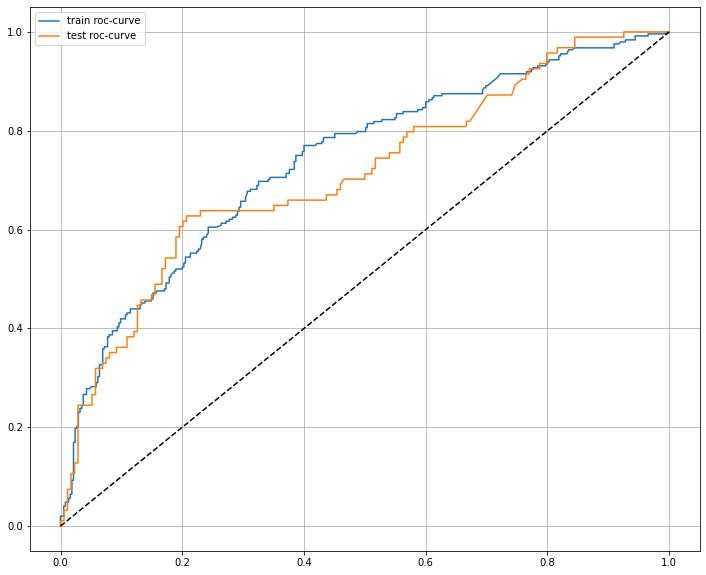

In [64]:
model = LogisticRegression().fit(X_data_train, y_data_train)
plot_roc_curve(model, X_data_train, X_data_test, y_data_train, y_data_test)

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [66]:
scaler = StandardScaler()

X_train_01 = scaler.fit_transform(X_train)
X_test_01 = scaler.transform(X_test)

In [67]:
result = cross_val_score(estimator=LogisticRegression(), X=X_train_01, y=y_train, scoring='accuracy', cv=5)
result

array([0.816     , 0.76      , 0.744     , 0.82258065, 0.83064516])

In [68]:
print(f'Среднее accuracy равно {result.mean()}, стандартное отклонение accuracy равно {result.std()}')

Среднее accuracy равно 0.7946451612903227, стандартное отклонение accuracy равно 0.035489829411753146


### Видим что предсказание на кросс-валидации улучшилось

Для наглядности обучим логрегрессию на всем train датасете и применим его для test, посмотрим значения roc-auc:

Train roc-auc: 0.8639363484087103
Test roc-auc: 0.8502292409577178


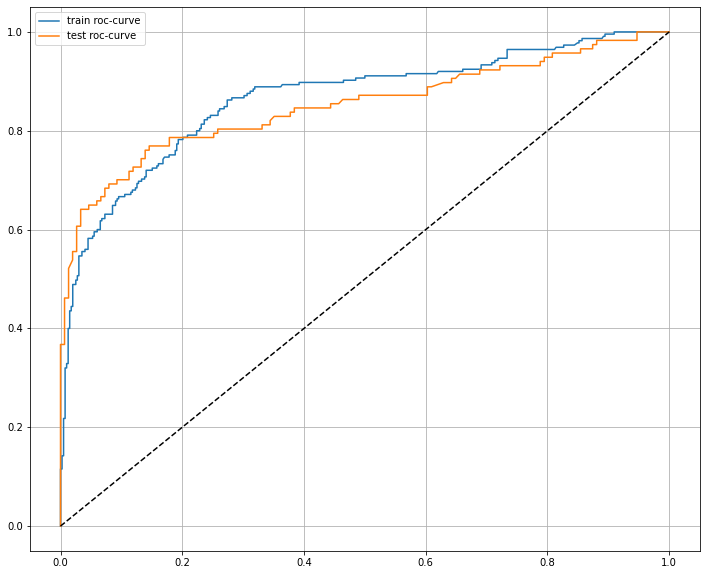

In [69]:
model = LogisticRegression().fit(X_train_01, y_train)
plot_roc_curve(model, X_train_01, X_test_01, y_train, y_test)

ВИдим что значение при обучении на всем train увеличилось. Отличие от его значения на test не значительно уменьшилось.

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [73]:
from sklearn.model_selection import GridSearchCV

In [71]:
def search(X, y, model, param_name, grid, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  if draw:
    plt.figure(figsize=(15, 8))
    plt.title('choose ' + param_name)

    plt.plot(grid, means, label='mean values of score')

    plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
    plt.legend()
    plt.xlabel('parameter')
    plt.ylabel('roc_auc')
    plt.show()

  return means, error

## 7.1. Случайный лес:

In [70]:
from sklearn.ensemble import RandomForestClassifier

Сделаем подбор параметров

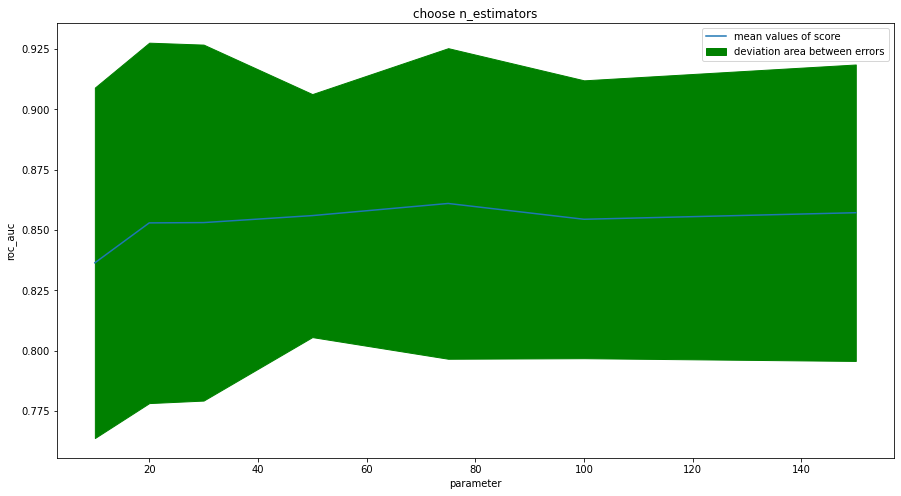

In [74]:
models = [RandomForestClassifier(n_jobs=-1)]
param_names = ['n_estimators']
grids = [[10, 20, 30, 50, 75, 100, 150]]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
  search(X_train_01, y_train, model, param_name, grid, param_scale)

Train roc-auc: 0.9996147403685092
Test roc-auc: 0.8507386653082019


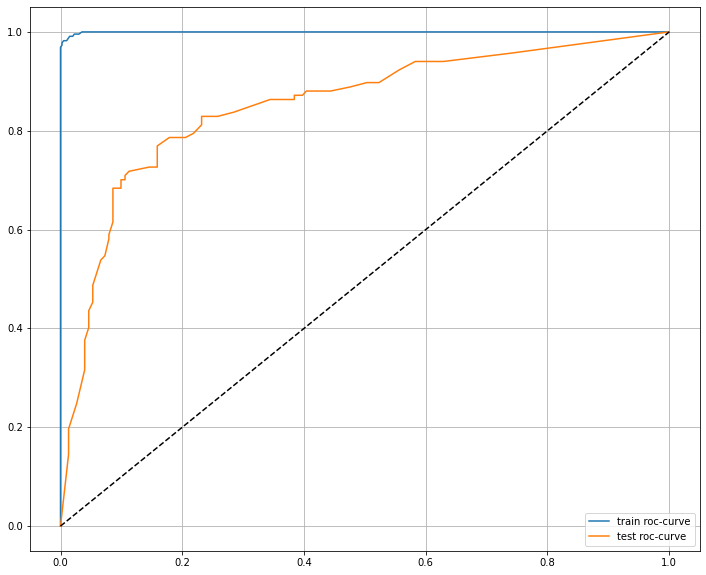

In [75]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1).fit(X_train_01, y_train)
plot_roc_curve(model, X_train_01, X_test_01, y_train, y_test)

7.2. xgboost

In [76]:
import xgboost

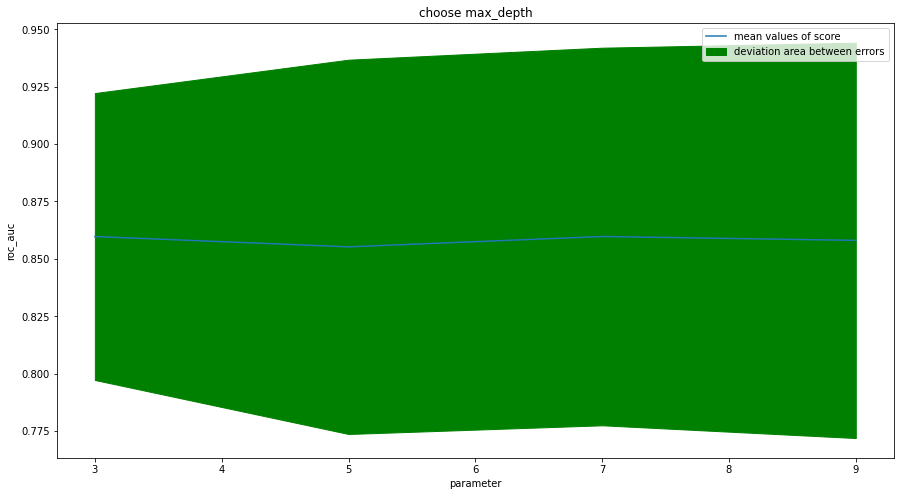

In [78]:
models = [xgboost.XGBClassifier(n_estimators=200)]
param_names = ['max_depth']
grids = [np.arange(3, 10, 2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
  search(X_train_01, y_train, model, param_name, grid, param_scale)

Train roc-auc: 0.9690563930764935
Test roc-auc: 0.8588894549159449


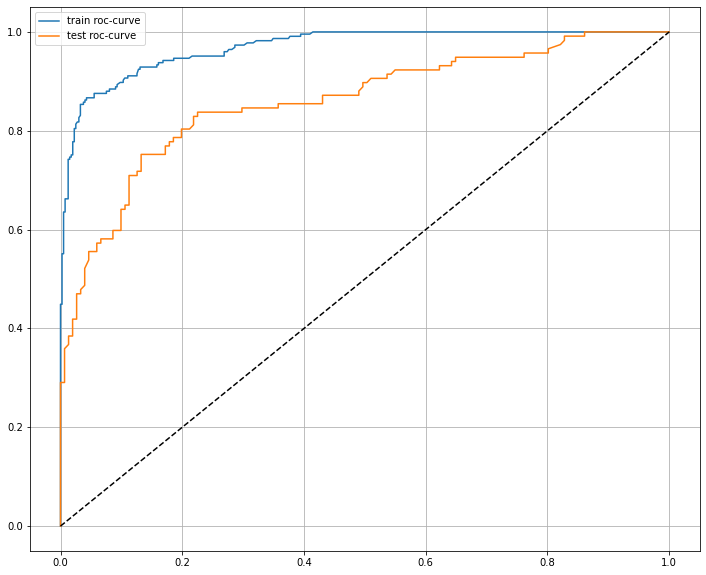

In [79]:
model = xgboost.XGBClassifier(max_depth=3, n_estimators=200).fit(X_train_01, y_train)
plot_roc_curve(model, X_train_01, X_test_01, y_train, y_test)

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [80]:
result = cross_val_score(estimator=xgboost.XGBClassifier(max_depth=3, n_estimators=200), X=X_train_01, y=y_train, scoring='accuracy', cv=5)
result

array([0.792     , 0.84      , 0.752     , 0.86290323, 0.84677419])

In [81]:
print(f'Среднее accuracy равно {result.mean()}, стандартное отклонение accuracy равно {result.std()}')

Среднее accuracy равно 0.8187354838709678, стандартное отклонение accuracy равно 0.040884102581719844


In [82]:
model = xgboost.XGBClassifier(max_depth=3, n_estimators=200).fit(X_train_01, y_train)

In [83]:
y_test_proba = model.predict_proba(X_test_01)[:, 1]

In [84]:
print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')

Test roc-auc: 0.8588894549159449


## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

Увидели что добавление логичных новых параметров привело к улучшению качества модели. Также подбор параметров моделей и рассмотрение множества моделей дает результат. Для случайных лесов и xgboost можно было не нормализовывать данные (это было нужно для логрегрессии).